<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [26]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [27]:
X_train.shape

(8982,)

In [68]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [35]:
len(word_index.values())

# hmm.... that's a lot

30979

In [69]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 200
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [54]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,   24,
          4, 1222, 2771,    7,  227,  236,   40,   

In [77]:
# borrowed model from totally differeny case -- SOURCE OF THE ERROR???

model = Sequential()
model.add(Embedding(30980, 1000, input_length=200))
# model.add(Flatten())
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [78]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1)
#           validation_data=(X_test, y_test))


Train...
Train on 8982 samples
8982/8982 [==============================] - 26s 3ms/sample - loss: nan - accuracy: 0.0499


In [79]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size,
                            verbose=False)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: nan
Test accuracy: 0.039626002


In [ ]:
# Please skip over the following acts of desperation ... thanks. ;)

In [ ]:
# hyperparameters

iteration = 2
sequence_length = 40
batch_size = 1000
hidden_size = 500  # size of hidden layer of neurons.  
learning_rate = 1e-1


# model parameters

W_xh = np.random.randn(hidden_size, max_features)*0.01     # weight input -> hidden. 
W_hh = np.random.randn(hidden_size, hidden_size)*0.01   # weight hidden -> hidden
W_hy = np.random.randn(max_features, hidden_size)*0.01     # weight hidden -> output

b_h = np.zeros((hidden_size, 1)) # hidden bias
b_y = np.zeros((max_features, 1)) # output bias

h_prev = np.zeros((hidden_size,1)) # h_(t-1)

In [39]:
def forwardprop(inputs, targets, h_prev):
        
    # Since the RNN receives the sequence, the weights are not updated during one sequence.
    xs, hs, ys, ps = {}, {}, {}, {} # dictionary
    hs[-1] = np.copy(h_prev) # Copy previous hidden state vector to -1 key value.
    loss = 0 # loss initialization
    
    for t in range(len(inputs)): # t is a "time step" and is used as a key(dic).  
        
        xs[t] = np.zeros((num_chars, 1)) 
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(W_xh, xs[t]) + np.dot(W_hh, hs[t-1]) + b_h) # hidden state. 
        ys[t] = np.dot(W_hy, hs[t]) + b_y # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars. 
        
        # Softmax. -> The sum of probabilities is 1 even without the exp() function, but all of the elements are positive through the exp() function.
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss). Efficient and simple code

#         y_class = np.zeros((num_chars, 1)) 
#         y_class[targets[t]] =1
#         loss += np.sum(y_class*(-np.log(ps[t]))) # softmax (cross-entropy loss)        

    return loss, ps, hs, xs

In [40]:
def backprop(ps, inputs, hs, xs, targets):

    dWxh, dWhh, dWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy) # make all zero matrices.
    dbh, dby = np.zeros_like(b_h), np.zeros_like(b_y)
    dhnext = np.zeros_like(hs[0]) # (hidden_size,1)

    # reversed
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t]) # shape (num_chars,1).  "dy" means "dloss/dy"
        dy[targets[t]] -= 1 # backprop into y. After taking the soft max in the input vector, subtract 1 from the value of the element corresponding to the correct label.
        dWhy += np.dot(dy, hs[t].T)
        dby += dy 
        dh = np.dot(W_hy.T, dy) + dhnext # backprop into h. 
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity #tanh'(x) = 1-tanh^2(x)
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(W_hh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]: 
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients.  
    
    return dWxh, dWhh, dWhy, dbh, dby

In [41]:
%%time

data_pointer = 0

# memory variables for Adagrad
mWxh, mWhh, mWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy)
mbh, mby = np.zeros_like(b_h), np.zeros_like(b_y) 

for i in range(iteration):
    h_prev = np.zeros((hidden_size,1)) # reset RNN memory
    data_pointer = 0 # go from start of data
    
    for b in range(batch_size):
        
        inputs = [char_to_int[ch] for ch in X_train[data_pointer:data_pointer+sequence_length]]
        targets = [char_to_int[ch] for ch in X_train[data_pointer+1:data_pointer+sequence_length+1]] # t+1        
            
        if (data_pointer+sequence_length+1 >= len(X_train) and b == batch_size-1): # processing of the last part of the input data. 
#             targets.append(char_to_int[txt_data[0]])   # When the data doesn't fit, add the first char to the back.
            targets.append(char_to_int[" "])   # When the data doesn't fit, add space(" ") to the back.


        # forward
        loss, ps, hs, xs = forwardprop(inputs, targets, h_prev)
#         print(loss)
    
        # backward
        dWxh, dWhh, dWhy, dbh, dby = backprop(ps, inputs, hs, xs, targets) 
        
        
    # perform parameter update with Adagrad
        for param, dparam, mem in zip([W_xh, W_hh, W_hy, b_h, b_y], 
                                    [dWxh, dWhh, dWhy, dbh, dby], 
                                    [mWxh, mWhh, mWhy, mbh, mby]):
            mem += dparam * dparam # elementwise
            param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update      
    
        data_pointer += sequence_length # move data pointer
        
    if i % 1 == 0:
        print ('iter %d, loss: %f' % (i, loss)) # print progress

NameError: name 'article_text' is not defined

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

You need a "pad" at the end of the section that the cursor is looking at so that that all the vectors that it encodes are of the same length otherwise it wont go through the layers of the NN -- the matrix multiplication wont match up.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

A more basic RNN without a LSTM cell, will only compare what it's looking at to immidiate neighbors -- only has a short memory. LSTM allows the NN to hang on to "phrases" (word or otherwise) that have been seem frequently in the long term. This way when it scans comparison, it can match to stuff that happens more immidiately to the cursor, or frequently in the scan overall.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. predictive text -- The main thing is that text as it is being written is time -sequence data. Stuff that is more immidiate has baring on what is going to come next, but a general understanding of language is needed too. 
2. object recognition -- Same as the last example, as you scan a photo all the textures/layer/etc of the immidiate surroundings matter, but so does a general "understanding" of the general case. 
3. translation -- (This feels a bit recurrant)... Language is a time series. The immortance of features are determined both by immidiate context and a grander scheme. 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [ ]:
!pip install google_images_download

In [ ]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [80]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=10)[0]
#     print(results)
    for entry in results:
        if entry[1] == 'frog':
            return entry[2]
            
#     return frogs

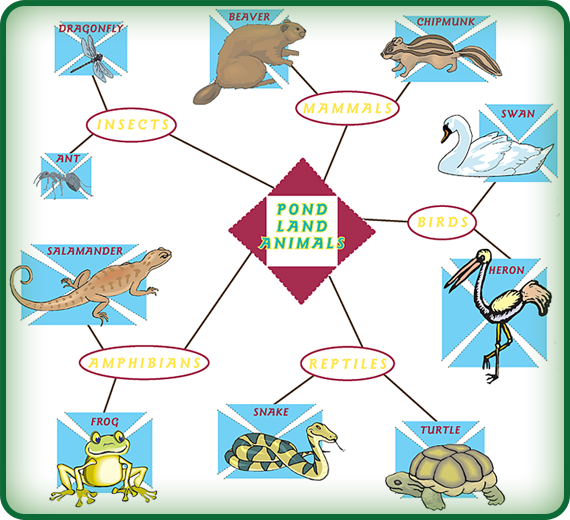

In [81]:
from IPython.display import Image
Image(filename='./downloads/animal_pond/1.PKLS4116_inline.png', width=600)

In [82]:
# From Jay -- process images into x
import os

data = []

for i in ['animal_pond']:
    for file in os.listdir('./downloads/'+i):
#         print(file)
        if file[-3:] == 'jpg' or file[-3:] == 'png':
            path = os.path.join(f'./downloads/{i}/' + file)
            img = process_img_path(path)
            x = image.img_to_array(img)

            x = np.expand_dims(x, axis=0)
            
            x = preprocess_input(x)
            
            data.append(x)
#             print(x)

In [83]:
import numpy as np

x = np.asarray(data)

In [84]:
x.shape

(4, 1, 224, 224, 3)

In [85]:
x = x.reshape(4,224,224,3)

In [86]:
x.shape

(4, 224, 224, 3)

In [87]:
### YOUR CODE HERE

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D

res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Remote the Last Layer of ResNE

# make all layers trainable
for layer in res.layers:
    layer.trainable = False
    
# add your head on top
x1 = res.output
x1 = GlobalAveragePooling2D()(x1)
predictions = Dense(1, activation='sigmoid')(x1)
model = Model(res.input, predictions)

None


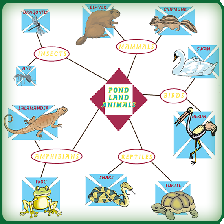

In [89]:
# looking at a couple examples here:
from tensorflow.keras.preprocessing import image

print(img_contains_frog(process_img_path('./downloads/animal_pond/1.PKLS4116_inline.png')))
image.load_img('./downloads/animal_pond/1.PKLS4116_inline.png', target_size=(224,224))

None


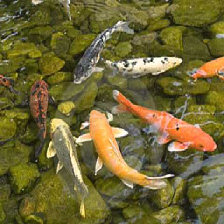

In [96]:
print(img_contains_frog(process_img_path('./downloads/animal_pond/2.hqdefault.jpg')))
image.load_img('./downloads/animal_pond/2.hqdefault.jpg', target_size=(224,224))

None


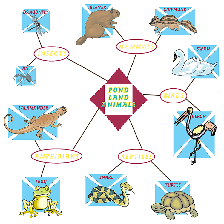

In [97]:
print(img_contains_frog(process_img_path('./downloads/animal_pond/3.PKLS4116.png')))
image.load_img('./downloads/animal_pond/3.PKLS4116.png', target_size=(224,224))

None


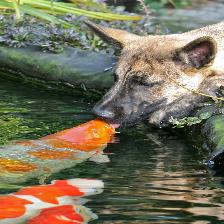

In [100]:
print(img_contains_frog(process_img_path('./downloads/animal_pond/4.12aee2aa186a7b69a66563f138bba822.jpg')))
image.load_img('./downloads/animal_pond/4.12aee2aa186a7b69a66563f138bba822.jpg', target_size=(224,224))

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [94]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

ValueError: Unsupported image shape: (1, 224, 224, 3)

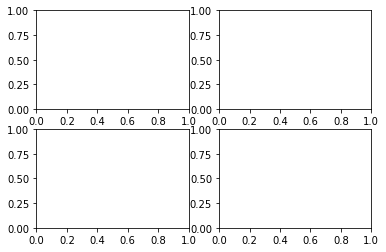

In [95]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

What more could you want than to automatically produce cat pictures??? Seriously? --- Although generation is the funnest part, the decoding can be seperated from the encoding. In the middle of the hour-glass is the reduced demensions of thr original array. So the use for autoencoders is demensionality reductions, like a file compresion. If you have the properly tuned decoder that pairs with your encoder, you can take you files, reduce them, do what you're going to do with them (maybe transfer, or store), then re-hydrate your strawberry. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
My strongest area of interest is not necessarily my strongest are for now, but will certainly become my strongest given time: Neural Nets. I'm very interested in their architecture and hyperparemeters. 
- What area of Data Science would you most like to learn more about, and why?
Again NNs. That's where my focus is at. I'm also interested in database architecture. On it's own, I the DBs are a bit boring, its all the use cases that I'm interested in, plus all the creative ways to query large data sets usign NNs. 
- Where do you think Data Science will be in 5 years?
Not incredibly difereny in it's directions, but it's tools will be far more powerful and accessible. All the stuff I know how to do know will be way more streamlined and packaged. I'll have to swim up stream to stay ahead of the what techniques are on the bleeding edge. 
- What are the threats posed by AI to our society?
The greatest threats are in the medium term in use of automized weapons. I think we are already in an arms race with the east. THis is going to be a major direction of development, much like the advent of tanks and aircraft before WWII. In the long term, we pose a greater threat to ourselves in other theaters than we face from the rise of truly thinking machines. 
- How do you think we can counteract those threats?
In short, we can't regulate ourselve to safety; we have to innovate our way. Musk probably has the right idea with Mind-Link. 
- Do you think achieving General Artifical Intelligence is ever possible?
It's not only possible, we are likely sitting on top of the technology that could make it possible. We just don't yet have a working understanding of what it is -- what constitutes intelligence. Our current understanding is far too athropocentric. There is a huge difference from creating intelligence and human-like intelligence. Machines are likely to to reach super-intelligence before human-like intelligence. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")